In [68]:
# -*- coding:utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
## 데이터 불러오기###########################################
KOSPI200_index=pd.read_csv('KOSPI200_index.csv').set_index('Date')
KOSPI200_close=pd.read_csv('KOSPI200_close.csv').set_index('Date')
df_port_info=pd.read_csv('codenamelist.csv',encoding='cp949',dtype=str)
df_pf=pd.DataFrame()
del df_port_info['Unnamed: 0']
###########################################################

In [70]:
## GLOBAL VARIABLE#########################################
target_n=240                  # 약 1년치 데이터(한달:20일로 가정)
initial_balance=100000000     # 초기 잔고 1억
balance=initial_balance
rperiod=20                    # rebalancing period
nperiod=int(120/rperiod)      # rebalncing 횟수
residual=0                    # 잔여 현금
balanceMat=np.zeros(target_n) # 포트폴리오의 가치 시계열
###########################################################

In [71]:
# 평균, 표준편차 구하기(%단위, 복습)
temp_df=KOSPI200_close.copy()
temp_diff=temp_df/temp_df.shift(1)
df_port_info['avgdaily']=[(x-1)*100 for x in temp_diff.iloc[1:120].mean().tolist()]
df_port_info['stddaily']=[x*100 for x in temp_diff.iloc[1:120].std().tolist()]
# 일별 평균 수익률로 정렬
df_sort=df_port_info.sort_values(by=['avgdaily'],ascending=False)
df_sort.head(10)

,Code,Name,avgdaily,stddaily
112,020150,일진머티리얼즈,0.352175,3.192410
82,042660,대우조선해양,0.244179,3.034941
27,036570,엔씨소프트,0.204871,2.157068
70,001450,현대해상,0.177274,2.332938
51,005830,DB손해보험,0.176737,2.156829
38,032640,LG유플러스,0.176232,2.251273
144,049770,동원F&amp;B;,0.171398,3.057371
7,017670,SK텔레콤,0.170888,1.545337
108,012450,한화에어로스페이스,0.163289,3.228776
81,030000,제일기획,0.128953,2.001684


Text(0,0.5,'E(R)(mean)')

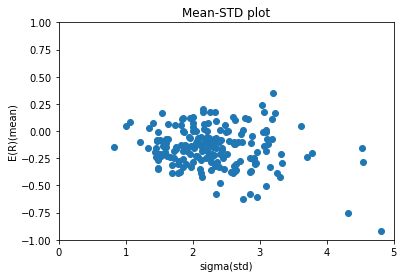

In [72]:
# 시각화
plt.title('Mean-STD plot')
plt.scatter(df_port_info.iloc[:,3],df_port_info.iloc[:,2])
plt.axis([0,5,-1,1])
plt.xlabel('sigma(std)')
plt.ylabel('E(R)(mean)')

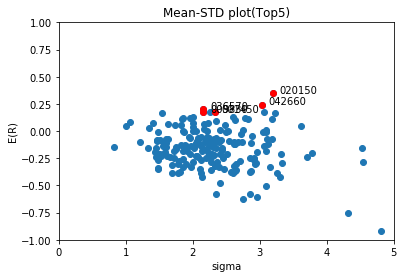

In [73]:
# 상위 5개 표시
plt.title('Mean-STD plot(Top5)')
plt.scatter(df_port_info.iloc[:,3],df_port_info.iloc[:,2])
plt.axis([0,5,-1,1])
plt.xlabel('sigma')
plt.ylabel('E(R)')

for i in range(5):
    plt.text(df_sort.iloc[i,3]+0.1,df_sort.iloc[i,2],df_sort.iloc[i,0])
    plt.scatter(df_sort.iloc[i,3],df_sort.iloc[i,2],color='r')

# 효율적 투자선 구하기 - 2자산

In [74]:
# Top 5개의 종목에 대한 Covariance Matrix 구성
port_list=df_sort['Code'].iloc[:5].tolist()
covMat=temp_diff.iloc[1:120].cov().loc[port_list,port_list]*10000
covMat

,020150,042660,036570,001450,005830
020150,10.191481,1.665928,0.646225,-1.210455,-1.284078
042660,1.665928,9.210868,0.083865,1.570023,1.583160
036570,0.646225,0.083865,4.652942,0.042634,0.411140
001450,-1.210455,1.570023,0.042634,5.442601,4.255160
005830,-1.284078,1.583160,0.411140,4.255160,4.651913


In [75]:
# Top 1,2 번 자산에 대하여 계산해보기
plot_list=[0,1]
ratio1=((df_sort['stddaily'].iloc[plot_list[1]])**2
        -covMat.iloc[plot_list[0],plot_list[1]])/((df_sort['stddaily'].iloc[plot_list[0]])**2
        +(df_sort['stddaily'].iloc[plot_list[1]])**2
          -2*covMat.iloc[plot_list[0],plot_list[1]])
ratio2=1-ratio1

print('MVP에 해당하는 자산1,2 의 weight : ',)
print('[',ratio1,ratio2,']')

MVP에 해당하는 자산1,2 의 weight : 
[ 0.46949027527387305 0.530509724726127 ]


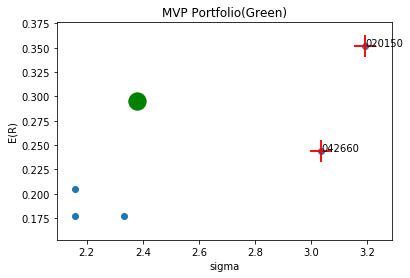

In [76]:
plt.title('MVP Portfolio(Green)')
plt.scatter(df_sort['stddaily'].iloc[:5],df_sort['avgdaily'].iloc[:5])
plt.xlabel('sigma')
plt.ylabel('E(R)')

plot_list=[0,1]
plt.scatter(df_sort['stddaily'].iloc[plot_list],df_sort['avgdaily'].iloc[plot_list],color='r',marker='+',s=500)
plt.scatter(df_sort['stddaily'].iloc[plot_list],df_sort['avgdaily'].iloc[plot_list],color='r',marker='+',s=500)
for i in plot_list:
    plt.text(df_sort.iloc[i,3],df_sort.iloc[i,2],str(df_sort.iloc[i,0]))

pf_ret=ratio1*df_sort['avgdaily'].iloc[0]+(1-ratio1)*df_sort['avgdaily'].iloc[1]
pf_std=np.sqrt((ratio1*df_sort['stddaily'].iloc[0])**2+((1-ratio1)*df_sort['stddaily'].iloc[1])**2
               +2*ratio1*(1-ratio1)*covMat.iloc[0,1])
plt.scatter(pf_std,pf_ret,color='g',s=300)


In [77]:
# 난수 발생
pf_ratio=np.random.uniform(0,1,30)      # 0~1 사이의 난수 30개
pf_ratio

array([0.49876623, 0.04897915, 0.78372809, 0.71589032, 0.13123637,
       0.18559698, 0.88249073, 0.38641661, 0.17801886, 0.67510302,
       0.90417792, 0.43053504, 0.83290819, 0.91456647, 0.57783584,
       0.97659127, 0.1771977 , 0.30974393, 0.53798384, 0.24848221,
       0.18210297, 0.31498152, 0.61154353, 0.93268053, 0.29252084,
       0.32396902, 0.73193463, 0.57724663, 0.68613236, 0.62065119])

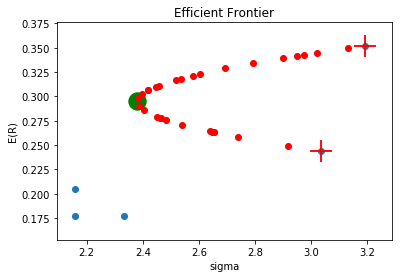

In [78]:
plt.title('Efficient Frontier')
plt.scatter(df_sort['stddaily'].iloc[:5],df_sort['avgdaily'].iloc[:5])
plt.xlabel('sigma')
plt.ylabel('E(R)')

plot_list=[0,1]
plt.scatter(df_sort['stddaily'].iloc[plot_list],df_sort['avgdaily'].iloc[plot_list],color='r',marker='+',s=500)
plt.scatter(df_sort['stddaily'].iloc[plot_list],df_sort['avgdaily'].iloc[plot_list],color='r',marker='+',s=500)

pf_ret=ratio1*df_sort['avgdaily'].iloc[0]+(1-ratio1)*df_sort['avgdaily'].iloc[1]
pf_std=np.sqrt((ratio1*df_sort['stddaily'].iloc[0])**2+((1-ratio1)*df_sort['stddaily'].iloc[1])**2
               +2*ratio1*(1-ratio1)*covMat.iloc[0,1])
plt.scatter(pf_std,pf_ret,color='g',s=300)

for i in range(30):
    pf_ret=pf_ratio[i]*df_sort['avgdaily'].iloc[0]+(1-pf_ratio[i])*df_sort['avgdaily'].iloc[1]
    pf_std=np.sqrt((pf_ratio[i]*df_sort['stddaily'].iloc[0])**2
                   +((1-pf_ratio[i])*df_sort['stddaily'].iloc[1])**2+2*pf_ratio[i]*(1-pf_ratio[i])*covMat.iloc[0,1])
    plt.scatter(pf_std,pf_ret,color='r')


# 효율적 투자선 구하기 - n자산

In [79]:
# 포트폴리오 분배 비율 난수 set 만들기
port_list=np.zeros((25,2),dtype=int)
result_list=np.zeros((250+300,2))    #  n=2 일때 200개, n=5일때 300개
c=0

for i in [0,1,2,3,4]:
    for j in [0,1,2,3,4]:
        port_list[i*5+j,0]=i
        port_list[i*5+j,1]=j

for k in range(25):
    aa=np.random.uniform(0,1,[10,2])
    bb=np.sum(aa,axis=1)
    cc=np.zeros((10,2))       #n1,과 n2의 weight 난수  , 합은 1
    for i in range(10):
        cc[i,:]=aa[i,:]/bb[i]
        result_list[c,0]=np.sqrt(np.sum(np.array(covMat.iloc[port_list[k],port_list[k]])         #covMat 의 n0,1의 covarience와의 연산
                                        *np.array(cc[i,:])*(np.array(cc[i,:]).reshape(-1,1))))   #n0,1 사이의 난수(mean,std)를 발생
        result_list[c,1]=np.sum(np.array(df_sort['avgdaily'].iloc[port_list[k]])*cc[i,:])
        c+=1
        
nn=5
aa=np.random.uniform(0,1,[300,nn])
bb=np.sum(aa,axis=1)
cc=np.zeros((300,nn))

for i in range(300):
    cc[i,:]=aa[i,:]/bb[i]
    result_list[c,0]=np.sqrt(np.sum(np.array(covMat.iloc[:nn,:nn])*np.array(cc[i,:])
                                 *(np.array(cc[i,:]).reshape(-1,1))))
    result_list[c,1]=np.sum(np.array(df_sort['avgdaily'].iloc[:nn])*cc[i,:])
    c+=1
result_list         # 난수 총 250+300개의 array

array([[3.19240987, 0.35217508],
       [3.19240987, 0.35217508],
       [3.19240987, 0.35217508],
       ...,
       [1.40479378, 0.23084857],
       [1.42872271, 0.23828622],
       [1.55226367, 0.23329848]])

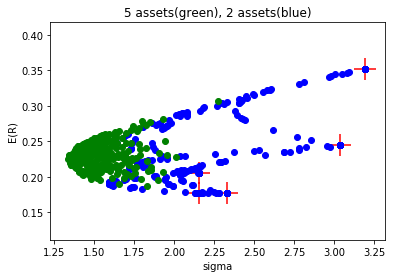

In [80]:
# 2가지 자산들로 구성된 포트폴리오와 5가지 자산으로 구성된 포트폴리오 비교
plt.title('5 assets(green), 2 assets(blue)')
plt.scatter(df_sort['stddaily'].iloc[:5],df_sort['avgdaily'].iloc[:5],color='r',marker='+',s=500)

plt.xlabel('sigma')
plt.ylabel('E(R)')

plt.scatter(result_list[:250,0],result_list[:250,1],color='b')
plt.scatter(result_list[250:,0],result_list[250:,1],color='g')


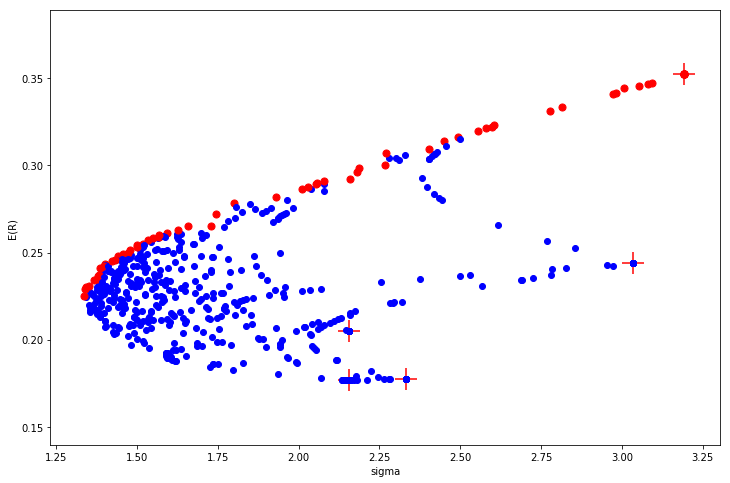

In [82]:
plt.figure(figsize=(12,8))

plt.scatter(df_sort['stddaily'].iloc[:5],df_sort['avgdaily'].iloc[:5],color='r',marker='+',s=500)

plt.xlabel('sigma')
plt.ylabel('E(R)')

for i in range(len(result_list)):
    if sum((result_list[:,0]<result_list[i,0])&(result_list[:,1]>result_list[i,1]))==0:     #발생한 난수 수익률 상위 50
        plt.scatter(result_list[i,0],result_list[i,1],color='r',s=50)
    else:
        plt.scatter(result_list[i,0],result_list[i,1],color='b')
        
#효율적 투자선 ->지배원리(dominance principle)
#:평균-분산 이론에 근거한 투자 대상중 기대수익률이 크면서, 위험이 작을수록 투자자산의 가치를 크게 평가하는 이론(빨간점)

In [83]:
def find_mvp(cMat,df_s):
    result_list=np.zeros((300,2))
    result_weight=np.zeros((300,5))
    c=0
    nn=5
    aa=np.random.uniform(0,1,[300,nn])
    bb=np.sum(aa,axis=1)
    cc=np.zeros((300,nn))

    for i in range(300):
        cc[i,:]=aa[i,:]/bb[i]
        result_list[c,0]=np.sqrt(np.sum(np.array(cMat.iloc[:nn,:nn])*np.array(cc[i,:])
                                     *(np.array(cc[i,:]).reshape(-1,1))))
        result_list[c,1]=np.sum(np.array(df_s['avgdaily'].iloc[:nn])*cc[i,:])
        result_weight[c,:]=cc[i,:]
        c+=1

    ## Find MVP ###############################################
    index_mvp = np.argmin(result_list[:,0])
    return result_weight[index_mvp]


# Benchmark
 * 6개월 기간수익률, 리밸런싱1달, 1/5 균등분배

In [84]:
import math
## 데이터 불러오기###########################################
RESULT=np.zeros((len(balanceMat),2))
KOSPI200_index=pd.read_csv('KOSPI200_index.csv').set_index('Date')
KOSPI200_close=pd.read_csv('KOSPI200_close.csv').set_index('Date')
df_port_info=pd.read_csv('codenamelist.csv',encoding='cp949',dtype=str)
df_pf=pd.DataFrame()
del df_port_info['Unnamed: 0']

## GLOBAL VARIABLE#########################################
target_n=240                  # 약 1년치 데이터(한달:20일로 가정)
initial_balance=100000000     # 초기 잔고 1억
balance=initial_balance
rperiod=20                    # rebalancing period
nperiod=int(120/rperiod)      # rebalncing 횟수
residual=0                    # 잔여 현금
balanceMat=np.zeros(target_n) # 포트폴리오의 가치 시계열
###########################################################

for i in range(nperiod):
    ##### 종목 선정 로직 적용 #################################################
    cur=120+rperiod*i
    st=np.array(KOSPI200_close.iloc[cur-120],dtype=int)
    en=np.array(KOSPI200_close.iloc[cur-1],dtype=int)
    rt=pd.DataFrame([x/y for x,y in zip(en,st)])
    df_port_info['return_period'+str(i)]=rt
    df_sort=df_port_info.sort_values(by=['return_period'+str(i)],ascending=False)
    ########################################################################
    
    ##### 자산 배분 #########################################################
    top_N=5
    port_list=list(df_sort.iloc[:top_N,0])

    pfMat=np.zeros(top_N)    
    for j,jj in enumerate(port_list):
        pfMat[j]=math.floor((balance/top_N)/int(KOSPI200_close[jj][cur]))
        balanceMat[cur:cur+rperiod]+=np.array(KOSPI200_close[jj][cur:cur+rperiod],dtype=int)*pfMat[j]
    ########################################################################
    
    ###### 메도/매수 이행#####################################################
    residual=balance-balanceMat[cur]
    balance=balanceMat[cur+rperiod-1]+residual
    ########################################################################
    
    ##### 결과 저장 #########################################################
    df_pf['Code_period'+str(i)]=list(df_sort['Code'].iloc[:top_N])
    df_pf['Name_period'+str(i)]=list(df_sort['Name'].iloc[:top_N])
    df_pf['return_period'+str(i)]=list(df_sort['return_period'+str(i)].iloc[:top_N])
    df_pf['volume_period'+str(i)]=pfMat
    ################################################################

RESULT[:,0]=balanceMat

In [85]:
df_pf

,Code_period0,Name_period0,return_period0,volume_period0,Code_period1,Name_period1,return_period1,volume_period1,Code_period2,Name_period2,...,return_period3,volume_period3,Code_period4,Name_period4,return_period4,volume_period4,Code_period5,Name_period5,return_period5,volume_period5
0,020150,일진머티리얼즈,1.432099,409.0,036570,엔씨소프트,1.393557,39.0,012450,한화에어로스페이스,...,1.615925,270.0,004800,효성,1.623126,244.0,009240,한샘,1.940083,199.0
1,042660,대우조선해양,1.266541,597.0,042660,대우조선해양,1.392197,575.0,009540,현대중공업,...,1.549683,490.0,034120,SBS,1.361878,763.0,025540,한국단자,1.671053,301.0
2,036570,엔씨소프트,1.241331,44.0,032640,LG유플러스,1.278571,1100.0,017800,현대엘리베이,...,1.418345,566.0,025540,한국단자,1.347678,315.0,064960,S&amp;T;모티브,1.651923,465.0
3,017670,SK텔레콤,1.208145,75.0,028050,삼성엔지니어링,1.274834,1027.0,105630,한세실업,...,1.376562,2119.0,005300,롯데칠성,1.292251,10.0,004800,효성,1.625272,267.0
4,005830,DB손해보험,1.200647,269.0,005180,빙그레,1.235200,251.0,000210,대림산업,...,1.375180,3897.0,105630,한세실업,1.287500,751.0,004490,세방전지,1.476969,399.0


In [86]:
KOSPI200_index=pd.read_csv('KOSPI200_index.csv').set_index('Date')
KOSPI200_close=pd.read_csv('KOSPI200_close.csv').set_index('Date')
df_port2_info=pd.read_csv('codenamelist.csv',encoding='cp949',dtype=str)
df_pf2=pd.DataFrame()
del df_port2_info['Unnamed: 0']

## GLOBAL VARIABLE#########################################
target_n=240                  # 약 1년치 데이터(한달:20일로 가정)
initial_balance=100000000     # 초기 잔고 1억
balance=initial_balance
rperiod=20                    # rebalancing period
nperiod=int(120/rperiod)      # rebalncing 횟수
residual=0                    # 잔여 현금
balanceMat=np.zeros(target_n) # 포트폴리오의 가치 시계열
###########################################################
for i in range(nperiod):
    ##### 종목 선정 로직 적용 #################################################
    top_N=5
    cur=120+rperiod*i
    
    temp_df=KOSPI200_close.copy()
    temp_diff=temp_df/temp_df.shift(1)
    df_port2_info=pd.read_csv('codenamelist.csv',encoding='cp949',dtype=str)
    
    # avgdaily, std 구해서 저장
    df_port2_info['avgdaily']=[(x-1)*100 for x in temp_diff.iloc[cur-119:cur].mean().tolist()]
    df_port2_info['stddaily']=[x*100 for x in temp_diff.iloc[cur-119:cur].std().tolist()]
    del df_port2_info['Unnamed: 0']
    
    df_sort2=df_port2_info.sort_values(by=['avgdaily'],ascending=False)
    
    port_list=df_sort2['Code'].iloc[:top_N].tolist()
    
    covMat=temp_diff.iloc[cur-119:cur].cov().loc[port_list,port_list]*10000
    
    port_list=list(df_sort2.iloc[:top_N,0])
    idx=find_mvp(covMat,df_sort2)
    ########################################################################
    
    ##### 자산 배분 #########################################################
    pfMat=np.zeros(top_N)    
    for j,jj in enumerate(port_list):
        pfMat[j]=math.floor((balance*idx[j])/int(KOSPI200_close[jj][cur]))
        balanceMat[cur:cur+rperiod]+=np.array(KOSPI200_close[jj][cur:cur+rperiod],dtype=int)*pfMat[j]
    ########################################################################
    
    ###### 메도/매수 이행#####################################################
    residual=balance-balanceMat[cur]
    balance=balanceMat[cur+rperiod-1]+residual
    ########################################################################
    
    ##### 결과 저장 #########################################################
    df_pf2['Code_period'+str(i)]=list(df_sort2['Code'].iloc[:top_N])
    df_pf2['Name_period'+str(i)]=list(df_sort2['Name'].iloc[:top_N])
    df_pf2['return_period'+str(i)]=list(df_sort2['avgdaily'].iloc[:top_N])
    df_pf2['volume_period'+str(i)]=pfMat
    ################################################################

RESULT[:,1]=balanceMat


In [87]:
df_pf2

,Code_period0,Name_period0,return_period0,volume_period0,Code_period1,Name_period1,return_period1,volume_period1,Code_period2,Name_period2,...,return_period3,volume_period3,Code_period4,Name_period4,return_period4,volume_period4,Code_period5,Name_period5,return_period5,volume_period5
0,020150,일진머티리얼즈,0.352175,459.0,042660,대우조선해양,0.322969,297.0,017800,현대엘리베이,...,0.452923,192.0,004800,효성,0.454376,154.0,009240,한샘,0.600466,283.0
1,042660,대우조선해양,0.244179,218.0,036570,엔씨소프트,0.303228,57.0,012450,한화에어로스페이스,...,0.421476,143.0,034120,SBS,0.295663,1093.0,025540,한국단자,0.467171,347.0
2,036570,엔씨소프트,0.204871,67.0,028050,삼성엔지니어링,0.233932,635.0,009540,현대중공업,...,0.336181,334.0,025540,한국단자,0.280119,232.0,064960,S&amp;T;모티브,0.458922,340.0
3,001450,현대해상,0.177274,490.0,032640,LG유플러스,0.229312,1550.0,105630,한세실업,...,0.299721,1372.0,105630,한세실업,0.259023,354.0,004800,효성,0.452180,268.0
4,005830,DB손해보험,0.176737,252.0,009540,현대중공업,0.209785,126.0,042660,대우조선해양,...,0.282291,10435.0,005300,롯데칠성,0.230188,17.0,105630,한세실업,0.345721,354.0


# 로직별 환산 수익률로 정리 후 결과비교

In [88]:
logicRESULT=pd.DataFrame(np.zeros((2,6)),columns=['ret_1m','ret_1m_1Y','ret_3m','ret_3m_1Y','ret_6m','ret_6m_1Y'])
logicRESULT['Logic name']=''
logicRESULT.loc[0,'Logic name']='Benchmark (weight: 1/n)'
logicRESULT.loc[1,'Logic name']='MVP-rebalancing'

In [89]:
logicRESULT.iloc[0,0]=((RESULT[120+20-1,0]/initial_balance)-1)*100
logicRESULT.iloc[0,1]=((RESULT[120+20-1,0]/initial_balance)-1)*100*12
logicRESULT.iloc[0,2]=((RESULT[120+60-1,0]/initial_balance)-1)*100
logicRESULT.iloc[0,3]=((RESULT[120+60-1,0]/initial_balance)-1)*100*4
logicRESULT.iloc[0,4]=((RESULT[120+120-1,0]/initial_balance)-1)*100
logicRESULT.iloc[0,5]=((RESULT[120+120-1,0]/initial_balance)-1)*100*2
# logicRESULT['Logic name'][0]='Benchmark'
logicRESULT

logicRESULT.iloc[1,0]=((RESULT[120+20-1,1]/initial_balance)-1)*100
logicRESULT.iloc[1,1]=((RESULT[120+20-1,1]/initial_balance)-1)*100*12
logicRESULT.iloc[1,2]=((RESULT[120+60-1,1]/initial_balance)-1)*100
logicRESULT.iloc[1,3]=((RESULT[120+60-1,1]/initial_balance)-1)*100*4
logicRESULT.iloc[1,4]=((RESULT[120+120-1,1]/initial_balance)-1)*100
logicRESULT.iloc[1,5]=((RESULT[120+120-1,1]/initial_balance)-1)*100*2
# logicRESULT['Logic name'][1]='MVP-rebalancing'
logicRESULT=logicRESULT.set_index('Logic name')

In [90]:
logicRESULT

,ret_1m,ret_1m_1Y,ret_3m,ret_3m_1Y,ret_6m,ret_6m_1Y
Logic name,,,,,,
Benchmark (weight: 1/n),-3.3511,-40.2132,-8.2753,-33.1012,-9.17455,-18.3491
MVP-rebalancing,-5.6925,-68.3100,-9.6966,-38.7864,-10.82670,-21.6534


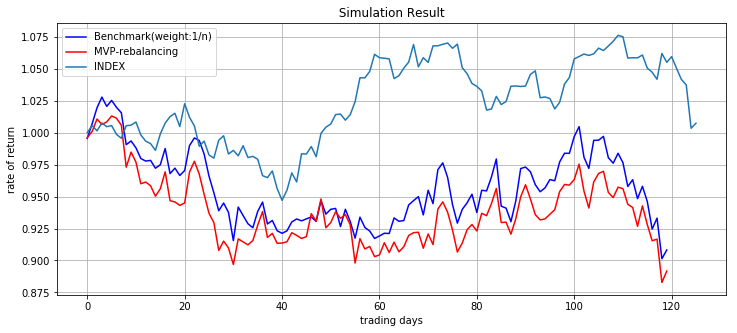

In [92]:
plt.figure(figsize=(12,5))
plt.plot(RESULT[120:,0]/initial_balance,color='b')
plt.plot(RESULT[120:,1]/initial_balance,color='r')

plt.title(' Simulation Result ')
plt.plot(list(KOSPI200_index['Close'])[120:]/KOSPI200_index['Close'][120])
plt.grid(20)
plt.ylabel('rate of return')
plt.xlabel('trading days')
plt.legend(['Benchmark(weight:1/n)','MVP-rebalancing','INDEX'])